In [2]:
from flashbax.vault import Vault
import matplotlib.pyplot as plt
import jax
import jax.numpy as jnp
v = Vault(
    rel_dir="experiment_results/ff_ippo/25-02-07/16-54-19/vaults",
    vault_name="jax_party",
    vault_uid="20250207165419",
)
buffer_state = v.read()

Loading vault found at /mnt/c/Users/ryanp/OneDrive/Documents/Jax-Party/experiment_results/ff_ippo/25-02-07/16-54-19/vaults/jax_party/20250207165419


In [ ]:
# from jax_party import upload_folder

# upload_folder(
#     name="ippo_experiment",
#     description="IPPO, rank_based_reward = 1.0",
#     folder_path="experiment_results/ff_ippo/25-02-07/13-18-26"
# )

In [3]:
buffer_state.experience["action"].shape

(64, 15616, 3)

In [15]:
actions = buffer_state.experience["action"]
rewards = buffer_state.experience["reward"]
action_mask = buffer_state.experience["legal_action_mask"]

In [5]:
action_sum_per_agent = actions.reshape((-1, 3)).sum(axis=0)
action_sum_per_agent

Array([323567, 323015, 324271], dtype=int32)

[1478549. 1681858. 1884888.]


<BarContainer object of 3 artists>

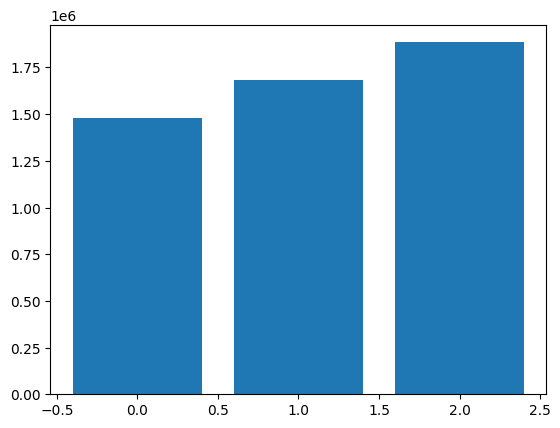

In [6]:
rewards_sum_per_agent = rewards.reshape((-1, 3)).sum(axis=0)
print(rewards_sum_per_agent)
plt.bar(jnp.arange(3), rewards_sum_per_agent)

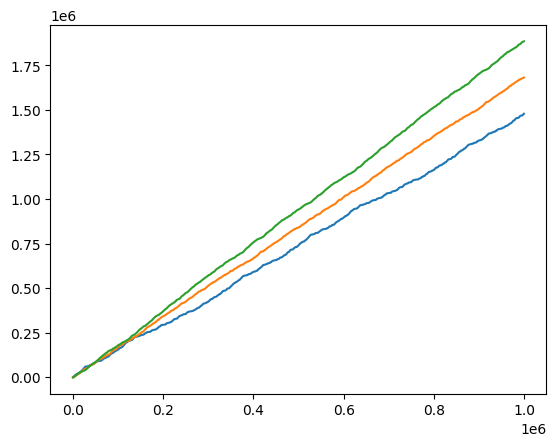

In [7]:
plt.plot(rewards.reshape((-1, 3)).cumsum(0))

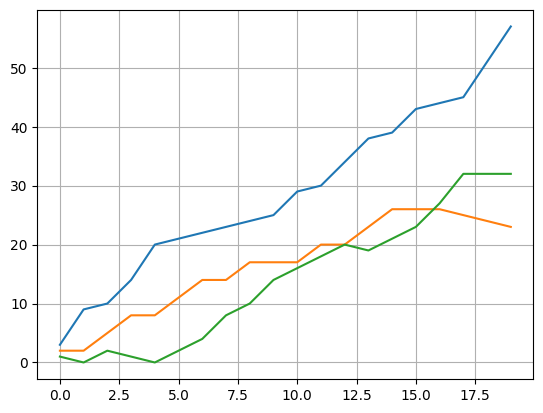

In [21]:
plt.plot(rewards.reshape((-1, 3)).cumsum(0)[:20])
plt.grid()

In [23]:
jax.tree.map(
    lambda x: x.reshape(-1, x.shape[-1])[:3],
    (jnp.int8(action_mask), actions, rewards),
)

(Array([[1, 1],
        [1, 1],
        [0, 0]], dtype=int8),
 Array([[0, 0, 0],
        [1, 1, 0],
        [0, 0, 0]], dtype=int32),
 Array([[ 3.,  2.,  1.],
        [ 6.,  0., -1.],
        [ 1.,  3.,  2.]], dtype=float32))